### Introduction

This data biography is a project in which I will be examining an online, digitized set of information on the Ku Klux Klan in the Greater Denver area during their peak influence in Colorado, the 1920s. The Ku Klux Klan (KKK) is a historically significant white supremacist group in the US, founded after the Civil War, which has promoted racial hierarchies and used intimidation, violence, and terrorism, particularly against African Americans, to oppose civil rights and maintain social and political dominance. The physical ledgers that the data is based on are currently held by the History Colorado Museum, and this museum has made this information available online in multiple versions, such as a PDF of the original ledgers, a digitized table of the information, as well as an interactive map that shows the scale of KKK membership in Colorado, all of which can be accessed [here](https://www.historycolorado.org/kkkledgers). This information was originally collected by the KKK, for administrative reasons, such as payment dues, date naturalized, etc., most likely in order to help the group expand rapidly, which they did, reaching a total of 30 thousand entries by 1926. These ledgers eventually found their way to the museum through an anonymous donation by a staff member of Rocky Mountain News in 1946, and have been publicly accessible since the turn of the century. The data which I will be analyzing has been cleaned up by Professor Blevins at CU Denver, in order to make the data easier to work with inside the coding language Python.

<div align="center">
  <img
    src="../assets/img/ledger.png"
    width="60%"
    style="border: 2px solid"
    alt="KKK ledger from 1920s"
  />
  <figcaption style="font-style: italic">
    Example page from Book 2 of the KKK ledgers
  </figcaption>
</div>


---

### Importing Data

In this project, I will be using Python to analyze this data to look for historical trends or interesting patterns. My first step will be importing the dataset and displaying some random entries.

In [6]:
import pandas as pd
import plotly.io as pio
import plotly.offline as pyo
pio.renderers.default = "jupyterlab"
pyo.init_notebook_mode(connected=True)

In [7]:
kkk_df = pd.read_csv('kkk-ledgers-index.csv', low_memory=False) #Bringing data into project

pd.set_option('display.max_columns', None) #Showing all columns 

kkk_df.sample(6)

itemID   Number          fullName Prefix Last Name First Name  \
19746  K19747   3876.0   Charles E Scott    NaN     Scott    Charles   
6969   K06970  17968.0  Paul Andrew Ross    NaN      Ross       Paul   
125    K00126    625.0       L L Clinton    NaN   Clinton          L   
469    K00470    969.0   Frank J McEniry    NaN   McEniry      Frank   
4785   K04786  15784.0   Willard J LeRoy    NaN     LeRoy    Willard   
18541  K18542   2473.0    Frank D Kooken    NaN    Kooken      Frank   

      Middle Name Suffix   residenceAddress1 residenceAddress2  \
19746           E    NaN                 NaN               NaN   
6969       Andrew    NaN       1548 Court Pl               NaN   
125             L    NaN                 NaN               NaN   
469             J    NaN        817 Humboldt               NaN   
4785            J    NaN  2719 W Dunkeld Pl.               NaN   
18541           D    NaN                 NaN               NaN   

        Residence Address Residence Other residenceCity residenceState  \
19746                 NaN             NaN           NaN            NaN   
6969        1548 Court Pl             NaN        Denver            CO*   
125                   NaN             NaN           NaN            NaN   
469          817 Humboldt             NaN        Denver            CO*   
4785   2719 W Dunkeld Pl.             NaN        Denver            CO*   
18541                 NaN             NaN           NaN            NaN   

      Residence City & State residencePhone businessAddress1 businessAddress2  \
19746                    NaN            NaN              NaN              NaN   
6969             Denver, CO*            NaN     1311 Lincoln              NaN   
125                      NaN            NaN       1501 Wazee              NaN   
469              Denver, CO*            NaN              NaN              NaN   
4785             Denver, CO*         G2329W              NaN              NaN   
18541                    NaN            NaN              NaN              NaN   

      Business Address Business Other businessCity businessState  \
19746              NaN            NaN          NaN           NaN   
6969      1311 Lincoln            NaN       Denver           CO*   
125         1501 Wazee            NaN       Denver           CO*   
469                NaN            NaN          NaN           NaN   
4785               NaN  C R I & P R R          NaN           NaN   
18541              NaN            NaN          NaN           NaN   

      Business City & State businessPhone     ledger              link  \
19746                   NaN           NaN  MSS.366.4  h-co.org/ledger1   
6969            Denver, CO*          C880  MSS.366.5  h-co.org/ledger2   
125             Denver, CO*           NaN  MSS.366.5  h-co.org/ledger2   
469                     NaN           NaN  MSS.366.5  h-co.org/ledger2   
4785                    NaN           NaN  MSS.366.5  h-co.org/ledger2   
18541                   NaN           NaN  MSS.366.4  h-co.org/ledger1   

      Ledger Link  Page           pdfFileName  symbolExists  sNumber  sErased  \
19746   MSS.366.4   135  mss366-4_p121-180_QC         False    False    False   
6969    MSS.366.5   310  mss366-5_p300-374_QC         False    False    False   
125     MSS.366.5    10    mss366-5_FC-p74_QC          True    False    False   
469     MSS.366.5    25    mss366-5_FC-p74_QC         False     True    False   
4785    MSS.366.5   215  mss366-5_p150-224_QC         False    False    False   
18541   MSS.366.4    83   mss366-4_p61-120_QC         False    False    False   

      Notes & Remarks Column 29  
19746             NaN       NaN  
6969              NaN       NaN  
125               NaN       NaN  
469               NaN       NaN  
4785              NaN       NaN  
18541             NaN       NaN

As shown in this sample, these ledgers contained information on members' names, addresses, phone numbers, as well as information on their businesses. Some other rows are used for referencing the original ledger, and thus are not relevant toward our analysis, so I am going to drop them to make the dataframe easier to work with.

In [9]:
kkk_df = kkk_df.drop(columns=['ledger', 'link', 'Ledger Link', 'Page','pdfFileName', 
                              'symbolExists', 'sNumber', 'sErased', 'Notes & Remarks', 'Column 29'])

kkk_df.sample(6) #Check our work

itemID   Number            fullName Prefix Last Name First Name  \
12918  K12919  23917.0   Thos Earl Fawcett    NaN   Fawcett       Thos   
21925  K21928   6057.0  William G Moritzky    NaN  Moritzky    William   
14227  K14228  25226.0  Chas. Simpson Huey    NaN      Huey      Chas.   
9791   K09792  20790.0   Albert N Washburn    NaN  Washburn     Albert   
8766   K08767  19765.0         Hugh A Gray    NaN      Gray       Hugh   
27472  K27480  11615.0         Roy V Platz    NaN     Platz        Roy   

      Middle Name Suffix residenceAddress1 residenceAddress2  \
12918        Earl    NaN       936 So Penn               NaN   
21925           G    NaN               NaN               NaN   
14227     Simpson    NaN      4600 High St               NaN   
9791            N    NaN         3844 Clay               NaN   
8766            A    NaN     519 W 8th Ave               NaN   
27472           V    NaN               NaN               NaN   

      Residence Address Residence Other residenceCity residenceState  \
12918       936 So Penn             NaN        Denver            CO*   
21925               NaN             NaN           NaN            NaN   
14227      4600 High St             NaN        Denver            CO*   
9791          3844 Clay             NaN        Denver            CO*   
8766      519 W 8th Ave             NaN        Denver            CO*   
27472               NaN             NaN           NaN            NaN   

      Residence City & State residencePhone businessAddress1 businessAddress2  \
12918            Denver, CO*            NaN              NaN              NaN   
21925                    NaN            NaN              NaN              NaN   
14227            Denver, CO*            NaN      521 30th St              NaN   
9791             Denver, CO*         G4141M   504 G & E Bldg   15th & Champa*   
8766             Denver, CO*          S1954     1512 11th St              NaN   
27472                    NaN            NaN              NaN              NaN   

                     Business Address            Business Other businessCity  \
12918                             NaN                       NaN          NaN   
21925                             NaN                       NaN          NaN   
14227                     521 30th St                       NaN       Denver   
9791   504 G & E Bldg, 15th & Champa*  Gas & Electric Building*       Denver   
8766                     1512 11th St                       NaN       Denver   
27472                             NaN                       NaN          NaN   

      businessState Business City & State businessPhone  
12918           NaN                   NaN           NaN  
21925           NaN                   NaN           NaN  
14227           CO*           Denver, CO*       FR3339W  
9791            CO*           Denver, CO*          CH44  
8766            CO*           Denver, CO*         M1651  
27472           NaN                   NaN           NaN


---

### Analysis

Reflecting on some of the larger themes from the work by D’Ignazio and Klein, *Data Feminism*, this data tells us way more than what is just printed above. Specficially, using their idea that "what gets counted counts" as well as "raw vs cooked data," we can utilize data that is present, as well as missing data, to paint a picture on the goals and motivations of the orignal KKK data collectors. Due to the vast quantites of data, it creates a false sense of completeness, giving the illusion that this dataset will explain all of the KKK's history. However, this dataset lacks any details on the victims of this violence, leaving out the stories of horror, resistance, and trauma, that are essential to the story of this hate group. Because these stories were omitted, these ledgers are not "just data," but instead go to reinforcing their power and status within their society. This datset is not merely a list of individuals, but acts a historical record of systemic violence present within our society. 

My first bit of analysis will look at the geographic data that is present in this dataset.

In [13]:
city_filter = kkk_df['residenceCity'].value_counts()   #Grouping common cities together
top_cities = city_filter.head(10)    #Showing the top 10 cities within this grouping
top_cities

residenceCity
Denver         15004
Aurora           264
Edgewater         40
Littleton         16
Golden            16
Arvada            15
Los Angeles       12
Wheatridge        10
Englewood         10
Fitzsimons         9
Name: count, dtype: int64

<Axes: title={'center': 'The KKK in Colorado:\n Top 10 Most Common Places of Residence of Members'}, xlabel='residenceCity'>

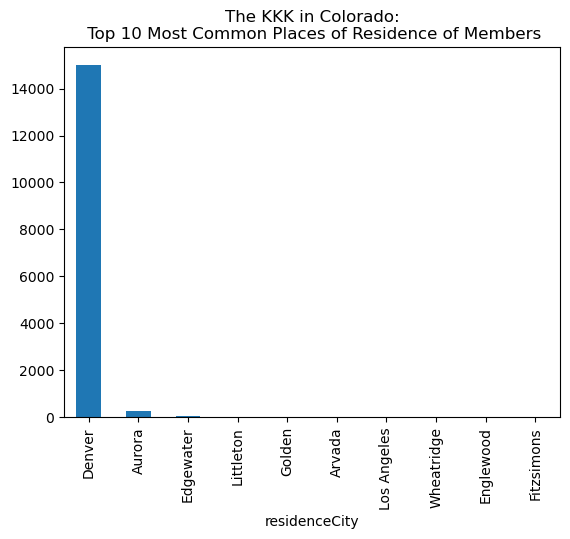

In [14]:
top_cities.plot(kind='bar', title='The KKK in Colorado:\n Top 10 Most Common Places of Residence of Members')

As evidenced by this graph, the overwhelming majority of members were located within the city proper. Tweaking this graph to exclude the outlier of Denver would help us get a better understanding of the relationship between the suburbs and membership. 

<Axes: title={'center': 'The KKK outside of Denver:\n Top 10 Most Common Suburbs of Residence of Members'}, xlabel='residenceCity'>

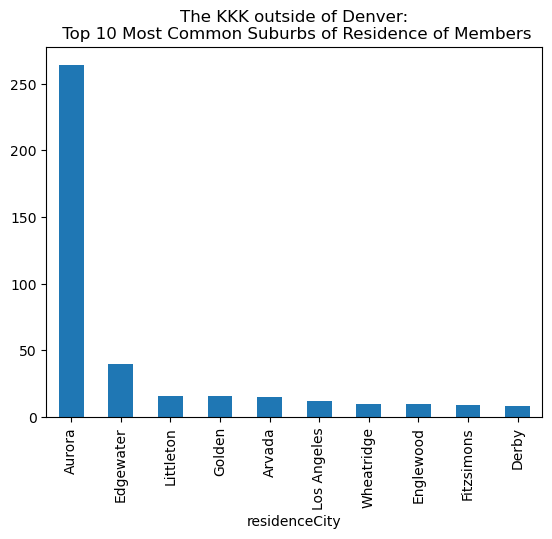

In [16]:
top_suburbs = city_filter.iloc[1:11]   #excluding Denver
top_suburbs.plot(kind='bar', title='The KKK outside of Denver:\n Top 10 Most Common Suburbs of Residence of Members')

I think it would also be valuable to see how frequently these ledgers contained information on members' residences, as that can allude to how comfortable these people felt while taking part in systemic violence. 100 years later, in today's world, I would guess that not many people in similar hate groups feel comfortable putting their address into the public sphere.

<div align="center">
  <img
    src="../assets/img/map.png"
    width="60%"
    style="border: 2px solid"
    alt="Interactive Map on website"
  />
  <figcaption style="font-style: italic">
    History Colorado's website has an interactive map with the location data from these ledgers.
  </figcaption>
</div>

In [18]:
address_info_known = kkk_df['residenceAddress1'].notna()
kkk_df[address_info_known].sample(6) #Showing random data that includes the addresses

itemID   Number           fullName Prefix  Last Name First Name  \
5580   K05581  16579.0   Carl E Patterson    NaN  Patterson       Carl   
12918  K12919  23917.0  Thos Earl Fawcett    NaN    Fawcett       Thos   
11938  K11939  22937.0   Robert F Wheeler    NaN    Wheeler     Robert   
1859   K01860  12858.0        Elwin Brace    NaN      Brace      Elwin   
3718   K03719  14717.0    Carl A Almquist    NaN   Almquist       Carl   
13199  K13200  24198.0      Jas R Bridges    NaN    Bridges        Jas   

      Middle Name Suffix  residenceAddress1 residenceAddress2  \
5580            E    NaN       1451 Fairfax               NaN   
12918        Earl    NaN        936 So Penn               NaN   
11938           F    NaN      950 W 4th Ave               NaN   
1859          NaN    NaN  240 S. Fenway St.               NaN   
3718            A    NaN      4011 Shoshone               NaN   
13199           R    NaN         3431 Tejon               NaN   

       Residence Address Residence Other residenceCity residenceState  \
5580        1451 Fairfax             NaN        Denver            CO*   
12918        936 So Penn             NaN        Denver            CO*   
11938      950 W 4th Ave             NaN        Denver            CO*   
1859   240 S. Fenway St.             NaN        Casper             WY   
3718       4011 Shoshone             NaN        Denver            CO*   
13199         3431 Tejon             NaN        Denver            CO*   

      Residence City & State residencePhone businessAddress1 businessAddress2  \
5580             Denver, CO*            NaN              NaN              NaN   
12918            Denver, CO*            NaN              NaN              NaN   
11938            Denver, CO*         S9465W              NaN              NaN   
1859              Casper, WY            NaN              NaN              NaN   
3718             Denver, CO*           G461  920 So Broadway              NaN   
13199            Denver, CO*            NaN     736 W Colfax              NaN   

      Business Address     Business Other businessCity businessState  \
5580               NaN                NaN        Lamar            CO   
12918              NaN                NaN          NaN           NaN   
11938              NaN                NaN          NaN           NaN   
1859               NaN                NaN          NaN           NaN   
3718   920 So Broadway                NaN       Denver           CO*   
13199     736 W Colfax  Cap Hill Creamery       Denver           CO*   

      Business City & State businessPhone  
5580              Lamar, CO           NaN  
12918                   NaN           NaN  
11938                   NaN           NaN  
1859                    NaN           NaN  
3718            Denver, CO*         S4200  
13199           Denver, CO*           NaN

In [19]:
address_percent = address_info_known.value_counts(normalize=True)
address_percent

residenceAddress1
True     0.503492
False    0.496508
Name: proportion, dtype: float64

Apart from the geographic data present within this dataset, there are more subtle signs that help reinforce the white supremacy that these people advocated for, specfically the prefix column. At this time, a majority of people in power in American society were white males, so looking at the frequency of prefixes could highlight some interesting narratives.

In [21]:
prefix_info_known = kkk_df['Prefix'].notna()
kkk_df[prefix_info_known].sample(6) #Showing random data that includes the prefixes

itemID   Number                     fullName    Prefix  Last Name  \
2864   K02865  13863.0          Dr. Chase C Gaisser       Dr.    Gaisser   
259    K00260    759.0               Dr. H S Greene       Dr.     Greene   
2039   K02040  13038.0            Dr. G D Hoschoner       Dr.  Hoschoner   
5325   K05326  16324.0             Dr. Wm J Roberts       Dr.    Roberts   
17365  K17366   1198.0        Dr. Merle L Mopherson       Dr.  Mopherson   
11219  K11220  22218.0  Minister Raymond Edw Little  Minister     Little   

      First Name Middle Name Suffix residenceAddress1 residenceAddress2  \
2864       Chase           C    NaN               NaN               NaN   
259            H           S    NaN               NaN               NaN   
2039           G           D    NaN               NaN               NaN   
5325          Wm           J    NaN  417 East 7th Ave               NaN   
17365      Merle           L    NaN               NaN               NaN   
11219    Raymond         Edw    NaN     1302 W Nevada               NaN   

      Residence Address Residence Other residenceCity residenceState  \
2864                NaN             NaN           NaN            NaN   
259                 NaN             NaN           NaN            NaN   
2039                NaN           Box 5        Eckley             CO   
5325   417 East 7th Ave             NaN        Denver            CO*   
17365               NaN             NaN           NaN            NaN   
11219     1302 W Nevada             NaN        Denver            CO*   

      Residence City & State residencePhone     businessAddress1  \
2864                     NaN            NaN                  NaN   
259                      NaN            NaN  205 Mercantile Bldg   
2039              Eckley, CO            NaN                  NaN   
5325             Denver, CO*         S2393J                  NaN   
17365                    NaN            NaN                  NaN   
11219            Denver, CO*         S7752W                  NaN   

       businessAddress2                       Business Address  \
2864                NaN                                    NaN   
259    15th & Arapahoe*  205 Mercantile Bldg, 15th & Arapahoe*   
2039                NaN                                    NaN   
5325                NaN                                    NaN   
17365               NaN                                    NaN   
11219               NaN                                    NaN   

             Business Other businessCity businessState Business City & State  \
2864                    NaN          NaN           NaN                   NaN   
259    Mercantile Building*       Denver           CO*           Denver, CO*   
2039                    NaN          NaN           NaN                   NaN   
5325       U S Veterans Bur          NaN           NaN                   NaN   
17365                   NaN          NaN           NaN                   NaN   
11219                   NaN          NaN           NaN                   NaN   

      businessPhone  
2864            NaN  
259             NaN  
2039            NaN  
5325          C8351  
17365           NaN  
11219           NaN

In [22]:
prefix_percent = prefix_info_known.value_counts(normalize=True)
prefix_percent

Prefix
False    0.994129
True     0.005871
Name: proportion, dtype: float64

In [23]:
top_prefixes = kkk_df['Prefix'].value_counts()
top_prefixes.head(15)

Prefix
Dr.         123
Minister     30
Reverend      5
Jr            3
Judge         2
Major         2
J             2
Chief         1
Captain       1
Bishop        1
Rev           1
D             1
F             1
H             1
Name: count, dtype: int64

<Axes: title={'center': 'Most common prefixes contained within KKK ledgers'}, ylabel='count'>

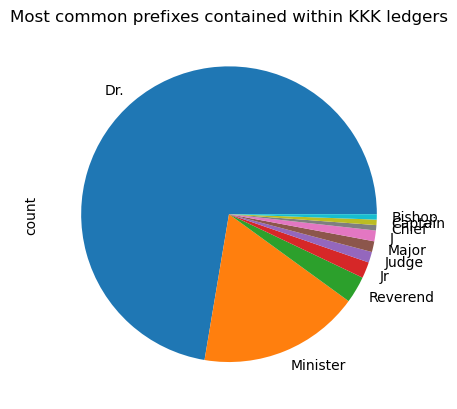

In [24]:
ten_top_prefixes = top_prefixes.head(10)
ten_top_prefixes.plot(kind='pie', title='Most common prefixes contained within KKK ledgers')

As I was predicting, many members of the KKK during this time held socially respected positions within society, with over one hundred doctors, as well as church leaders, city officals, and military officers. This goes to reinforce the idea that the racism that the KKK was famous for, was not coming from some niche group on the fringes of society, but in fact the bigotry and hatred was embedded within our mainstream institutions.

<div align="center">
  <img
    src="../assets/img/stapleton.png"
    width="60%"
    style="border: 2px solid"
    alt="Mayor Stapleton"
  />
  <figcaption style="font-style: italic">
    This line has a B. Stapleton, which could refrence Denver's infamous Mayor.
  </figcaption>
</div>

---

### Conclusion

While this dataset may initially appear to be a simple collection of names, addresses, and miscellaneous details, a closer examination reveals deeper narratives shaped by power and intent. Drawing from the themes of *Data Feminism*, it becomes clear that there is no such thing as "raw" data. In this case, the processes of data collection and organization were shaped by the Klan’s exclusionary and racist ideologies. These ledgers are not just historical records, in fact they are instruments of power that reflect how white supremacy was codified, normalized, and sustained through documentation. Analyzing them critically allows us to move beyond surface-level observations and toward a deeper understanding of how data can mirror and perpetuate systems of oppression.

<div align="center">
  <img
    src="../assets/img/kkk-picture.png"
    width="60%"
    style="border: 2px solid"
    alt="3 Hooded Klansmen next to a cross"
  />
  <figcaption style="font-style: italic">
    Three hooded Klansmen stand next to a burning cross. 
  </figcaption>
</div>

--- 

### Sources

- [History Colorado - KKK ledgers](https://www.historycolorado.org/kkkledgers)
- [Colorado Encyclopedia - KKK in Colorado](https://coloradoencyclopedia.org/article/ku-klux-klan-colorado)
- [Assignment Page](https://cblevins.github.io/sp25-data/assignments/data-biography/)